In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
sleep = pd.read_csv('SLEEP.csv')
# Convert date columns to datetime
sleep['date'] = pd.to_datetime(sleep['date'])
sleep['start'] = pd.to_datetime(sleep['start'])
sleep['stop'] = pd.to_datetime(sleep['stop'])

In [67]:
# Delete useless columns
sleep.drop(['REMTime', 'naps'], axis = 1, inplace = True)

In [68]:
# Create new columns: total sleep(in minutes and hours), drop rows with total sleep time < 3 hours
sleep['total_min'] = sleep ['deepSleepTime'] + sleep ['shallowSleepTime'] + sleep ['wakeTime']
sleep['total_hrs'] = sleep['total_min']/60
sleep = sleep[sleep['total_min'] > 180]

In [69]:
 # Create columns with weekday (Monday, Tuesday) and mark weekends
sleep['weekday'] = sleep['date'].dt.day_name()
sleep['is_weekend'] = sleep['date'].dt.weekday >= 5  

In [70]:
# Reset index after deleting rows
sleep.reset_index(drop=True, inplace=True)

In [71]:
sleep.to_csv("sleep_cleaned.csv", index=False)
print("Cleaned sleep dataset shape:", sleep.shape)
sleep.describe()
sleep.head()

Cleaned sleep dataset shape: (655, 10)


,date,deepSleepTime,shallowSleepTime,wakeTime,start,stop,total_min,total_hrs,weekday,is_weekend
0,2023-01-01,167,274,0,2023-01-01 00:22:00+00:00,2023-01-01 07:43:00+00:00,441,7.350000,Sunday,True
1,2023-01-03,234,334,0,2023-01-02 22:29:00+00:00,2023-01-03 07:57:00+00:00,568,9.466667,Tuesday,False
2,2023-01-04,151,367,0,2023-01-03 22:47:00+00:00,2023-01-04 07:25:00+00:00,518,8.633333,Wednesday,False
3,2023-01-05,171,271,0,2023-01-05 00:33:00+00:00,2023-01-05 07:55:00+00:00,442,7.366667,Thursday,False
4,2023-01-06,166,373,0,2023-01-05 22:53:00+00:00,2023-01-06 07:52:00+00:00,539,8.983333,Friday,False


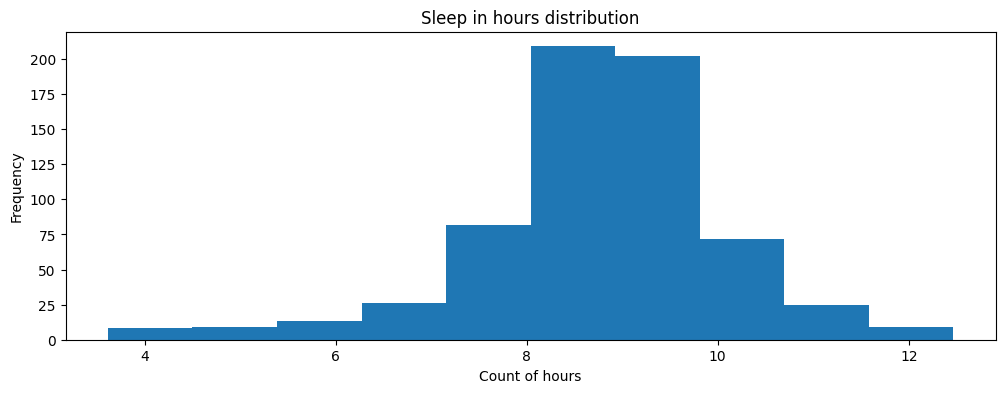

In [72]:
#Distribution of sleep hours throughout 2 years
plt.figure(figsize = (12,4))
plt.hist(sleep['total_hrs'])
plt.title('Sleep in hours distribution')
plt.xlabel("Count of hours")
plt.ylabel("Frequency")
plt.show()

In [73]:
activity = pd.read_csv('ACTIVITY.csv')
activity.dtypes
# Convert date columns to datetime
activity['date'] = pd.to_datetime(activity['date'])

In [74]:
#Drop rows with  around zero activity
activity = activity[activity['steps'] >= 500]

In [75]:
#Create new columns to extract more info: run ratio,day name, weekend marker
activity['weekday'] = activity['date'].dt.day_name()
activity['is_weekend'] = activity['date'].dt.weekday >= 5 

In [76]:
activity.head()

,date,steps,distance,runDistance,calories,weekday,is_weekend
0,2023-01-01,15845,11370,240,383,Sunday,True
1,2023-01-02,9312,6993,226,240,Monday,False
2,2023-01-03,5795,4350,186,148,Tuesday,False
3,2023-01-04,1077,737,67,27,Wednesday,False
4,2023-01-05,4086,2949,192,98,Thursday,False


In [77]:
activity.to_csv("activity_cleaned.csv", index=False)

print("Cleaned activity dataset shape:", activity.shape)
activity.describe()

Cleaned activity dataset shape: (680, 7)


,date,steps,distance,runDistance,calories
count,680,680.000000,680.000000,680.000000,680.000000
mean,2024-05-19 02:38:49.411764736,6354.607353,4773.714706,269.255882,163.983824
min,2023-01-01 00:00:00,504.000000,345.000000,33.000000,14.000000
25%,2023-09-05 18:00:00,2770.000000,1992.250000,162.750000,70.000000
50%,2024-04-24 12:00:00,5254.000000,3949.500000,232.000000,136.500000
75%,2025-02-22 06:00:00,8438.750000,6356.000000,330.000000,215.000000
max,2025-08-28 00:00:00,29080.000000,22443.000000,1854.000000,777.000000
std,NaN,4910.728941,3786.555963,161.546017,127.984287


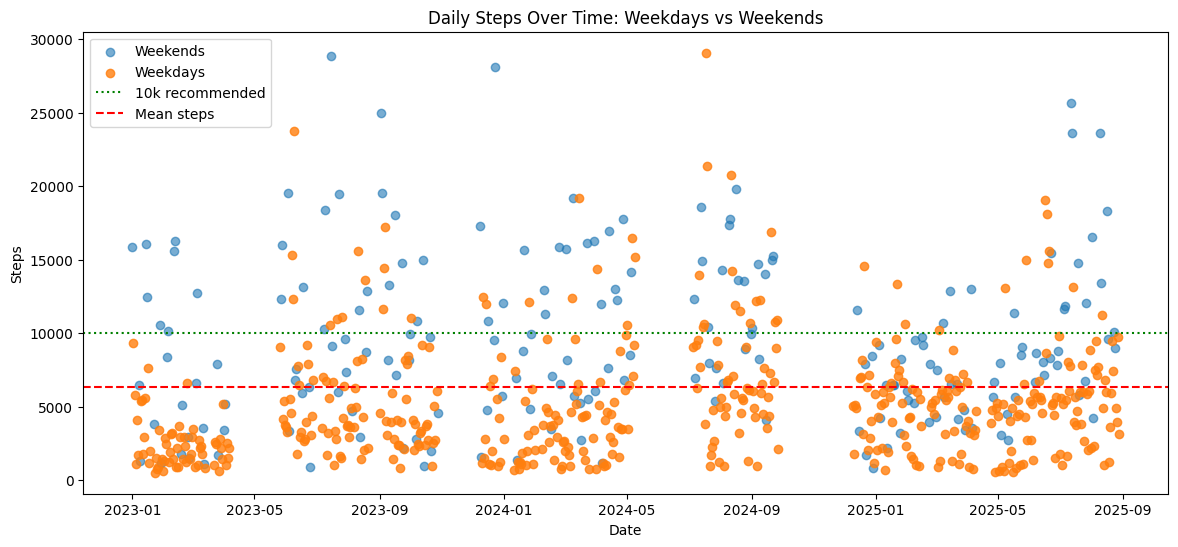

In [78]:
#Steps per day over day compared by weekend/weekday with regard to recommended 10k per day
#Weekends
plt.figure(figsize =(14,6))
plt.scatter(activity[activity['is_weekend']]['date'],activity[activity['is_weekend']]['steps'], label = 'Weekends', alpha = 0.6)

#Weekdays
plt.scatter(activity[~activity['is_weekend']]['date'],activity[~activity['is_weekend']]['steps'], label = 'Weekdays', alpha = 0.8)
# Goal line
plt.axhline(y=10000, color = 'green', ls = ':', label = '10k recommended')
# Mean line
plt.axhline(activity['steps'].mean(), color='red', linestyle='--', label='Mean steps')
plt.title('Daily Steps Over Time: Weekdays vs Weekends')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.legend()
plt.show()

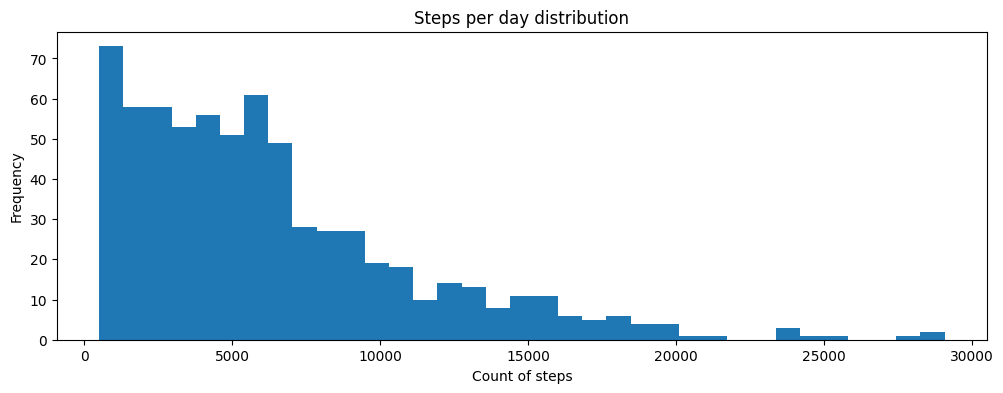

In [79]:
#Distribution of steps per day throughout 2 years
plt.figure(figsize = (12,4))
plt.hist(activity['steps'], bins = 35)
plt.title('Steps per day distribution')
plt.xlabel("Count of steps")
plt.ylabel("Frequency")
plt.show()

In [80]:
heartrate = pd.read_csv('HEARTRATE.csv')
heartrate.dtypes
#Combining date and time to a single column in datetime format
heartrate['datetime'] = pd.to_datetime(heartrate['date'] + ' ' + heartrate['time'])
heartrate['date'] = pd.to_datetime(heartrate['date'])

In [81]:
#Detected that there is a great variation between counts of heart rates per day
heartrate_count = heartrate.groupby('date').size().sort_values(ascending=False)
print(heartrate_count)

date
2024-09-24    442
2025-02-15    329
2025-02-03    258
2024-08-10    208
2025-06-05    143
             ... 
2025-06-10      1
2025-07-20      1
2025-07-30      1
2025-08-03      1
2025-08-18      1
Length: 131, dtype: int64


In [82]:
#Create new columns with hour of the day and day part based of the hour
heartrate['hour'] = heartrate['datetime'].dt.hour

conditions = [
    (heartrate['hour'] >= 0) & (heartrate['hour'] < 6),
    (heartrate['hour'] >= 6) & (heartrate['hour'] < 12),
    (heartrate['hour'] >= 12) & (heartrate['hour'] < 18),
    (heartrate['hour'] >= 18) & (heartrate['hour'] <= 23)
]
values = ['night', 'morning', 'day', 'evening']

heartrate['day_part'] = np.select(conditions, values, default='unknown')
print(heartrate.groupby('day_part').size())

day_part
day         505
evening    1462
morning     243
night       609
dtype: int64


In [83]:
# Calculate average heartrate for date and day_part 
cleaned_heartrate = heartrate.groupby(['date', 'day_part'])['heartRate'].mean().reset_index()
cleaned_heartrate.rename(columns={'heartRate': 'avg_heartrate'}, inplace=True)
cleaned_heartrate.to_csv("cleaned_heartrate.csv", index=False)
cleaned_heartrate.head(30)

,date,day_part,avg_heartrate
0,2023-01-02,morning,88.942857
1,2023-01-05,evening,102.000000
2,2023-01-09,evening,83.333333
3,2023-01-10,night,102.000000
4,2023-01-13,night,71.000000
5,2023-01-16,evening,76.000000
6,2023-01-18,evening,99.666667
7,2023-01-22,evening,81.000000
8,2023-01-23,morning,73.500000
9,2023-01-28,day,67.000000


In [84]:
for name, df in [('Sleep', sleep), ('Activity', activity), ('Heartrate', cleaned_heartrate)]:
    print(f"\n{name} date range: {df['date'].min()} -> {df['date'].max()}")


Sleep date range: 2023-01-01 00:00:00 -> 2025-08-29 00:00:00

Activity date range: 2023-01-01 00:00:00 -> 2025-08-28 00:00:00

Heartrate date range: 2023-01-02 00:00:00 -> 2025-08-24 00:00:00


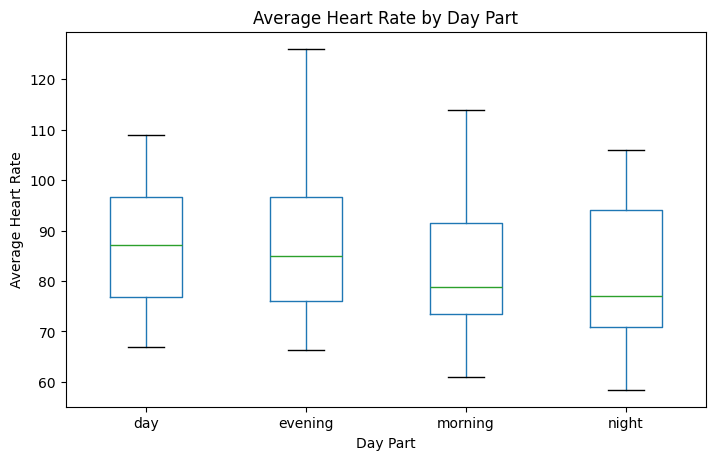

In [85]:
cleaned_heartrate.boxplot(column='avg_heartrate', by='day_part', figsize=(8,5),grid=False)
plt.title("Average Heart Rate by Day Part")
plt.suptitle("")  # removes the extra default title
plt.xlabel("Day Part")
plt.ylabel("Average Heart Rate")
plt.show()

In [86]:
sleep_summary = {
    "avg_sleep_hours": round(sleep['total_hrs'].mean(),2),
    "median_sleep_hours": round(sleep['total_hrs'].median(),2),
    "min_sleep_hours": round(sleep['total_hrs'].min(),2),
    "max_sleep_hours": round(sleep['total_hrs'].max(),2),
    "sleep_std_dev": round(sleep['total_hrs'].std(),2),
    "avg_sleep_weekday": round(sleep.groupby('weekday')['total_hrs'].mean(),2).to_dict()
}

sleep_summary

{'avg_sleep_hours': np.float64(8.77),
 'median_sleep_hours': np.float64(8.87),
 'min_sleep_hours': np.float64(3.62),
 'max_sleep_hours': np.float64(12.47),
 'sleep_std_dev': np.float64(1.3),
 'avg_sleep_weekday': {'Friday': 8.61,
  'Monday': 9.03,
  'Saturday': 8.6,
  'Sunday': 8.86,
  'Thursday': 8.75,
  'Tuesday': 8.94,
  'Wednesday': 8.56}}

In [87]:
activity_summary = {
    "avg_daily_steps": round(activity['steps'].mean()),
    "median_daily_steps": round(activity['steps'].median()),
    "percent_days_over_10k": round((activity['steps'] > 10000).mean() * 100, 2),
    "avg_daily_calories": round(activity['calories'].mean()),
    "avg_daily_distance": round(activity['distance'].mean())
}

activity_summary

{'avg_daily_steps': 6355,
 'median_daily_steps': 5254,
 'percent_days_over_10k': np.float64(18.09),
 'avg_daily_calories': 164,
 'avg_daily_distance': 4774}

In [88]:
heartrate_summary = {
    "avg_hr_overall": round(cleaned_heartrate['avg_heartrate'].mean()),
    "min_avg_hr": round(cleaned_heartrate['avg_heartrate'].min()),
    "max_avg_hr": round(cleaned_heartrate['avg_heartrate'].max()),
    "avg_hr_by_daypart": round(cleaned_heartrate.groupby('day_part')['avg_heartrate'].mean(),2).to_dict()
}

heartrate_summary


{'avg_hr_overall': 85,
 'min_avg_hr': 58,
 'max_avg_hr': 126,
 'avg_hr_by_daypart': {'day': 87.25,
  'evening': 87.16,
  'morning': 80.68,
  'night': 81.48}}

In [90]:
merged = activity.merge(sleep[['date','total_hrs']], on='date', how='outer')
merged = merged.merge(cleaned_heartrate.groupby('date')['avg_heartrate'].mean().rename('avg_hr'), 
                      on='date', how='outer')
merged.to_csv("merged_file.csv", index=False)

cross_summary = merged[['steps','total_hrs','avg_hr']].corr()
cross_summary

,steps,total_hrs,avg_hr
steps,1.000000,-0.170672,-0.120317
total_hrs,-0.170672,1.000000,0.050558
avg_hr,-0.120317,0.050558,1.000000
